# Initialisierung

In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
pos = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_pos.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
description.loc[description['Table']=="POS_CASH_balance.csv", "Row":"Special"]

,Row,Description,Special
145,SK_ID_PREV,"ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",NaN
146,SK_ID_CURR,ID of loan in our sample,NaN
147,MONTHS_BALANCE,"Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )",time only relative to the application
148,CNT_INSTALMENT,Term of previous credit (can change over time),NaN
149,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
150,NAME_CONTRACT_STATUS,Contract status during the month,NaN
151,SK_DPD,DPD (days past due) during the month of previous credit,NaN
152,SK_DPD_DEF,DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,NaN


In [5]:
# Function to draw a Piechart
def draw_piechart(arguments):
    
    fig, ax = plt.subplots(1,len(arguments))

    try:
    # Handle multiple plots
        for argument, a in zip(arguments,ax):
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]

            a.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False, labeldistance=1.05)
            a.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            a.set_title(title)
            
    # Handle single plot           
    except TypeError:
        for argument in arguments:
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]
        
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(title)
    plt.show()

# Datenaufbereitung

In [6]:
pos.head()

,SK_ID_CURR,PA_CNT_CREDITS,PA_POS_CNT_PAYMENTS_LEFT,PA_POS_CNT_DPD,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
0,158271,1,0.0,0.0,6404.310,58905.000,65124.0,0.000,58905.000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,252457,1,9.0,0.0,4951.350,47056.275,52641.0,4.275,47056.275,0.000088,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,260094,9,70.0,0.0,97839.945,2023469.370,2294779.5,8765.370,2023469.370,0.312513,0.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0,3.0,0.0,4.0,0.0
3,176456,1,0.0,0.0,14713.605,123486.075,120307.5,12349.575,123486.075,0.101388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,256657,3,28.0,0.0,60139.575,1115806.500,1277523.0,78714.000,1115806.500,0.699443,2.0,7.0,5.0,1.0,0.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0


In [7]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
pos = pd.merge(pos, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

# Austausch der numerischen Kategorien durch sprechende, interpretierbare Variablen
pos["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

# Unterteilung des Datensatzen nach Payback und Default
payback = pos[pos["TARGET"] == "Payback"]
default = pos[pos["TARGET"] == "Default"]

# Datenanalyse

In [8]:
pos.head()

,SK_ID_CURR,PA_CNT_CREDITS,PA_POS_CNT_PAYMENTS_LEFT,PA_POS_CNT_DPD,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest,TARGET
0,158271,1,0.0,0.0,6404.310,58905.000,65124.0,0.000,58905.000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Payback
1,252457,1,9.0,0.0,4951.350,47056.275,52641.0,4.275,47056.275,0.000088,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,Payback
2,260094,9,70.0,0.0,97839.945,2023469.370,2294779.5,8765.370,2023469.370,0.312513,0.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0,3.0,0.0,4.0,0.0,Payback
3,176456,1,0.0,0.0,14713.605,123486.075,120307.5,12349.575,123486.075,0.101388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Payback
4,256657,3,28.0,0.0,60139.575,1115806.500,1277523.0,78714.000,1115806.500,0.699443,2.0,7.0,5.0,1.0,0.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,Payback


In [9]:
payback = payback[["PA_CNT_CREDITS", "PA_POS_CNT_PAYMENTS_LEFT", "PA_POS_CNT_DPD"]]
default = default[["PA_CNT_CREDITS", "PA_POS_CNT_PAYMENTS_LEFT", "PA_POS_CNT_DPD"]]

In [10]:
pb = payback[payback["PA_POS_CNT_PAYMENTS_LEFT"] < payback["PA_POS_CNT_PAYMENTS_LEFT"].quantile(0.95)]["PA_POS_CNT_PAYMENTS_LEFT"].copy()
df = default[default["PA_POS_CNT_PAYMENTS_LEFT"] < default["PA_POS_CNT_PAYMENTS_LEFT"].quantile(0.95)]["PA_POS_CNT_PAYMENTS_LEFT"].copy()

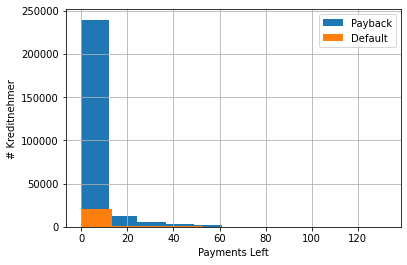

In [11]:
head = "PA_POS_CNT_PAYMENTS_LEFT"

pb = payback[head].copy()
df = default[head].copy()

pb.hist()
df.hist()

plt.legend(labels=["Payback","Default"])
plt.xlabel("Payments Left")
plt.ylabel("# Kreditnehmer")
plt.show()

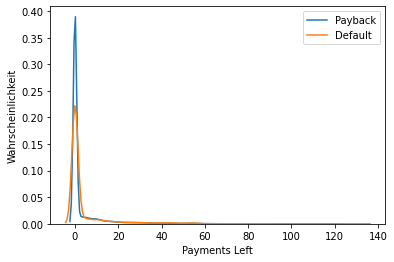

In [12]:
head = "PA_POS_CNT_PAYMENTS_LEFT"

pb = payback[head].copy()
df = default[head].copy()

sns.kdeplot(pb)
sns.kdeplot(df)

plt.legend(labels=["Payback","Default"])
plt.xlabel("Payments Left")
plt.ylabel("Wahrscheinlichkeit")
plt.show()

In [13]:
pb = payback["PA_POS_CNT_DPD"].copy()
df = default["PA_POS_CNT_DPD"].copy()

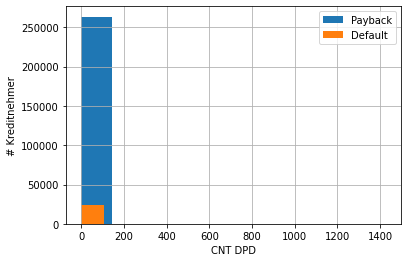

In [14]:
head = "PA_POS_CNT_DPD"

pb = payback[head].copy()
df = default[head].copy()

pb.hist()
df.hist()

plt.legend(labels=["Payback","Default"])
plt.xlabel("CNT DPD")
plt.ylabel("# Kreditnehmer")
plt.show()

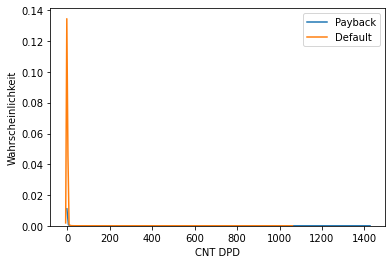

In [15]:
head = "PA_POS_CNT_DPD"

pb = payback[head].copy()
df = default[head].copy()

sns.kdeplot(pb)
sns.kdeplot(df)

plt.legend(labels=["Payback","Default"])
plt.xlabel("CNT DPD")
plt.ylabel("Wahrscheinlichkeit")
plt.show()